In [3]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [10]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

## Function to Detect License Plate Number

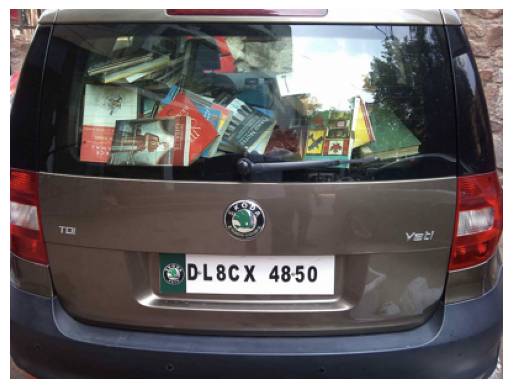

Detected Plate Number: DL8CX 4850


In [18]:
def detect_plate_number(image_path):
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    ##Edge Detection using Canny and Contours in the Image
    edges = cv2.Canny(blurred, 100, 200)
    contours, _ = cv2.findContours(edges.copy(),
                                  cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_SIMPLE)

    ##Approximate contours and checking for a rectangle
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    plate_contour = None
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        if len(approx) == 4:
            plate_contour = approx
            break

    ##Extracting License plate and Apply Thresholding
    if plate_contour is not None:
        x, y, w, h = cv2.boundingRect(plate_contour)
        plate_image = gray[y:y + h, x:x + w]

        _, thresh = cv2.threshold(plate_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        ##OCR to Recognize Plate Number
        plate_number = pytesseract.image_to_string(thresh, config='--psm 8')
        return plate_number.strip()
    else:
        return "License plate not Detected"

image_path = 'car1.png'

plate_number = detect_plate_number(image_path)
print("Detected Plate Number:", plate_number)